In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [41]:
def create_lollipop_plot(gene, combined_maf, domains, protein_length):
    # Load the data and filter for the specified gene mutations
    
    gene_muts = combined_maf[combined_maf['Hugo_Symbol'] == gene]
    gene_muts = gene_muts.drop_duplicates(['Patient_ID', 'Start_position'])
    #gene_muts = gene_muts.drop_duplicates(['Tumor_Sample_Barcode', 'Start_position'])
    # Count mutations by protein change
    alt_df = gene_muts.groupby(['Patient_ID', 'Protein_change']).size().unstack().fillna(0).astype(bool).astype(int)
    #alt_df = gene_muts.groupby(['Tumor_Sample_Barcode', 'Protein_change']).size().unstack().fillna(0).astype(bool).astype(int)
    # Create a dictionary of mutation counts
    alt_dict = {}
    for mut in list(alt_df.columns):
        alt_dict[mut] = list(alt_df[[mut]].sum(axis=0))[0]

    # Calculate relative sizes
    patch_width = protein_length * 0.06
    patch_height = protein_length * 0.025
    spacing = protein_length * 0.03
    max_height = protein_length * 0.8

    # Create the plot
    fig_width = max(10, protein_length / 50)
    plt.figure(figsize=(fig_width, 4))
    ax = plt.gca()
    plt.axis('off')

    # Draw the protein backbone
    ax.plot([0, protein_length], [0, 0], lw=10, color='gray', solid_capstyle='butt')

    # Draw the domains
    for dom, name in domains.items():
        ax.plot(dom, [0, 0], lw=16, solid_capstyle='butt')
        mid = (dom[0] + dom[1]) / 2
        ax.annotate(name, (mid, -protein_length * 0.02), ha='center', va='center', fontsize=10)

    # Plot the mutations
    heights = {patch_height * 2: []}
    for alt, count in alt_dict.items():
        if 'p.' in alt:
            pos = int(''.join(filter(str.isnumeric, alt)))
            h = patch_height * 2
            while any([x < pos + spacing and x > pos - spacing for x in heights[h]]) or h < count * patch_height:
                h += patch_height
                heights.setdefault(h, [])
            heights[h].append(pos)
            ax.plot([pos, pos], [0, h], lw=1, color='gray', zorder=-1)
            patch = patches.Rectangle((pos - patch_width/2, h - patch_height/2), width=patch_width, height=patch_height, ec='black', fc='wheat')
            ax.add_patch(patch)
            ax.annotate(f"{alt.replace('p.', '')}\n(n={count})", (pos, h), 
                        verticalalignment='center', horizontalalignment='center', fontsize=8)

    ax.set_xlim(-protein_length * 0.02, protein_length * 1.02)
    ax.set_ylim(-protein_length * 0.1, min(max(max(heights.keys()) + patch_height * 2, protein_length * 0.2), max_height))
    ax.set_aspect('equal')

    plt.title(f'{gene} Mutations Lollipop Plot', fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig(str(gene)+'_lollipop.svg',format='svg',bbox_inches='tight')
    plt.show()

In [21]:

RA_subclones_maf=pd.read_csv('~/Documents/2023/CDK4_mutsig_added_pats/for_mutsig_112223_all_subclones.maf',sep='\t',index_col=0)
RA_clones_maf=pd.read_csv('~/Documents/2023/CDK4_mutsig_added_pats/for_mutsig_112223_all_clones.maf',sep='\t',index_col=0)
pre_post_maf = pd.read_csv('~/Documents/2020/clonal_comut_plot/pre_post_muts_updated_MGH0001_0505_with_clones.tsv',sep='\t')

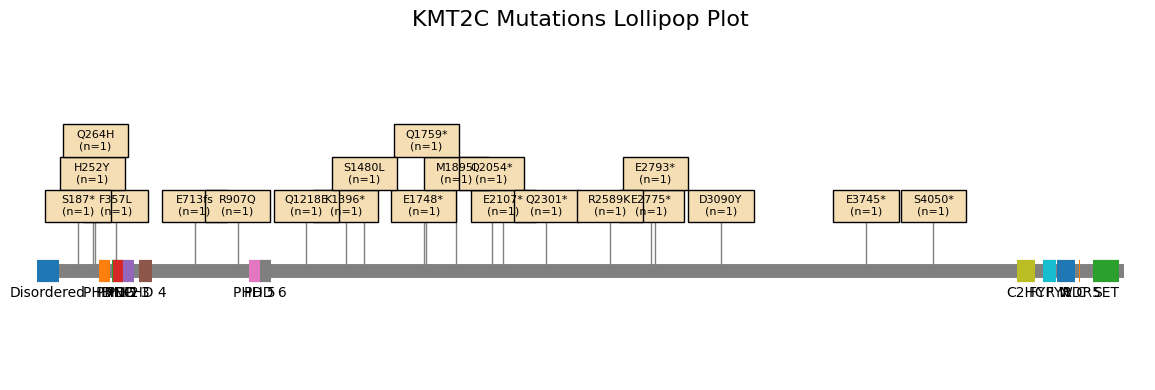

In [23]:
KMT2C_doms = {(1, 101): 'Disordered', (283,331): 'PHD 1',(341,391): 'PHD 2',(344,389):'RING',(388,438): 'PHD 3',(464,520): 'PHD 4',
              (957,1010): 'PHD 5',(1007,1057): 'PHD 6', (4429,4507):'C2HC',(4545,4605):'FYR N',(4606,4691):'FYR C',
              (4707,4712):'WDR5', (4771, 4887): 'SET'}
create_lollipop_plot('KMT2C', RA_subclones_maf, KMT2C_doms, 4911)

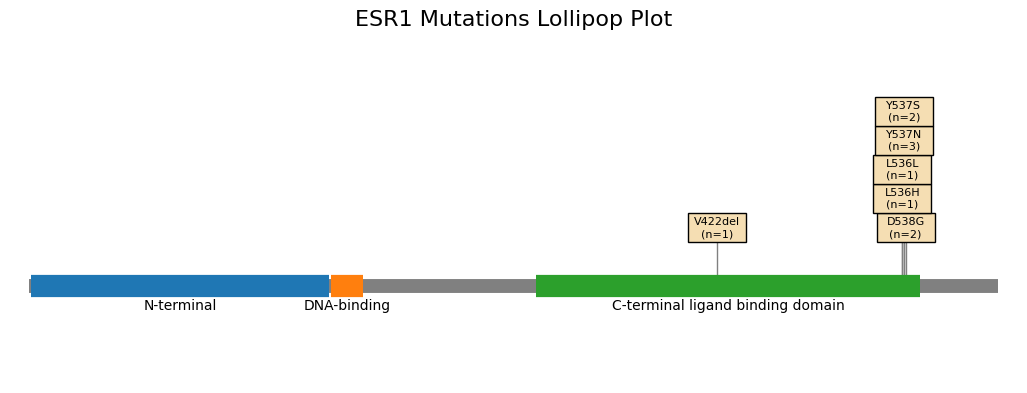

In [24]:
ESR1_doms = {(1,184):'N-terminal', (185,205):'DNA-binding', (311,547):'C-terminal ligand binding domain'}
create_lollipop_plot('ESR1', RA_subclones_maf, ESR1_doms, 595)


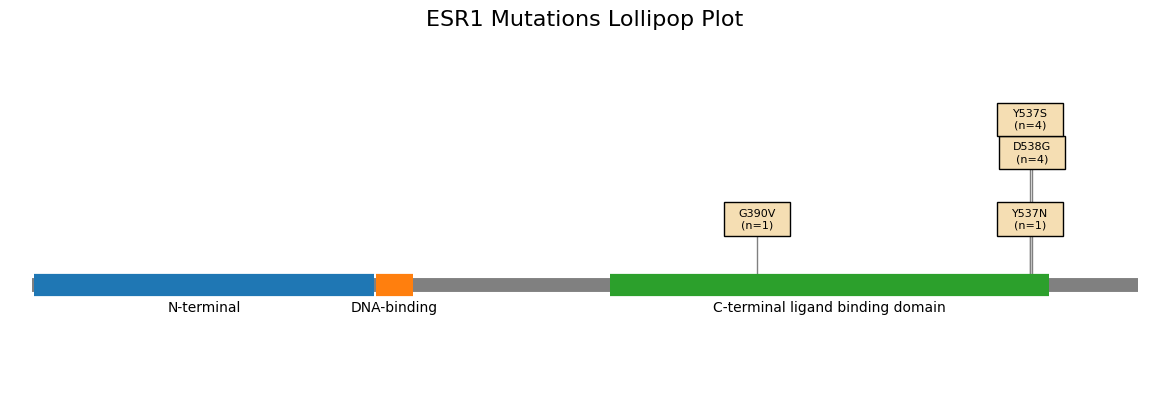

In [32]:

ESR1_doms = {(1,184):'N-terminal', (185,205):'DNA-binding', (311,547):'C-terminal ligand binding domain'}
create_lollipop_plot('ESR1', pre_post_maf, ESR1_doms, 595)


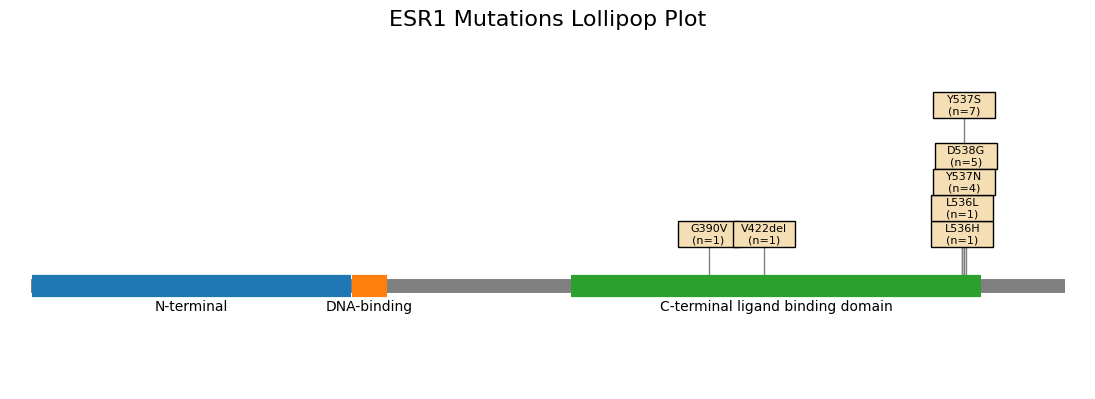

In [42]:
combine_ra_biopsy=pd.concat([ pre_post_maf,RA_clones_maf])
combine_ra_biopsy_drop_dup=combine_ra_biopsy[combine_ra_biopsy['Patient_ID']!='MGHCC1002']
ESR1_doms = {(1,184):'N-terminal', (185,205):'DNA-binding', (311,547):'C-terminal ligand binding domain'}
create_lollipop_plot('ESR1', combine_ra_biopsy_drop_dup, ESR1_doms, 595)